# T-test Fest

In this session, we will be thinking about surprising events and group differences. For example, if you read "men are taller than women", what does that mean? Are all men taller than all women? Are most men taller than most women? Or maybe men are taller than women *on average*? But what then is a meaningful difference? Would it be meaningful if men, on average, are 1 cm taller than women? Where do you draw the line? Also, how many men and women would you need to test before you believe they might be different in height?

How we think about these questions has shaped our usage of statistics, and you could even argue that how we use statistics has shaped how we think about differences between groups. (That sounds a bit esoteric now, but will become clearer towards the end of this session.)

## Do you need to measure the entire population?

Let's start with an example. When I'm in a debate with someone, but find that I struggle to come up with a sensible argument, I like to hold my breath in anger. My opponent is now left with only two options: Concede the point, or engage in an impromptu breath-holding competition.

Obviously, this strategy only works if I have a high likelihood of being able to hold my breath longer than my opponent. How could we come to know this likelihood?

First, we need to know how long I can hold my breath. This is easy: I just hold my breath for as long as I can, and record how long it was using a stopwatch. Let's say this was 83 seconds.

Next, we need to compare my breath-holding ability with the people I usually debate. In order to do this, we need to establish who this population is. As I work and live in Cambridge, the people I debate are likely those who live here, and specifically those found in and around the University. This is a problem: It's cumbersome and potentially expensive to test *everyone* who is associated with the University of Cambridge.

Instead of the whole target population, maybe we could take a random selection of people from them? If those people are representative, we could use them to infer what the population must look like. This is called a *sample".

In this case, we used ourselves$^*$ as a convenience sample by measuring how long we could hold our breath. 

\* *Of course, this is not ideal: We're all undergraduate students, most of us are around the same age, and we were made to do this as a stupid exercise in what should have been a serious stats class. So perhaps the sample is biased, and the measurement sub-optimal. Let's forget about those very reasonable objections for now, and simply assume the sample is representative of the wider Cambridge population.*

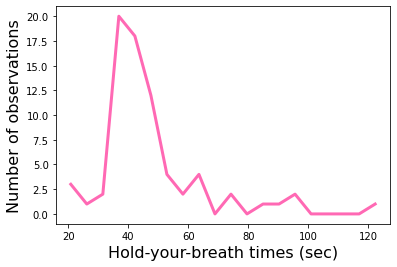

In [1]:
import numpy
from matplotlib import pyplot

# These times were measured during three stats classes.
times_a = [45.53, 41.30, 36.21, 49.3, 41.0, 63, 38.15, \
    35.1, 38.1, 47.9, 46.6, 23.0, 60.0, 42.0, 35.7, 41.2]
times_b = [42.0, 38.0, 46.0, 88.1, 125, 41.3, 36.0, \
    40.0, 43.7, 34.7, 38.4, 42.0, 61.0, 36.0, 43.4, \
    36.14, 18.23, 49.0, 38.0, 22.47, 35.51, 63.15, \
    35.2, 51.53, 34.13, 54.0, 43.2]
times_c = [94.0, 83.0, 95.0, 36.5, 49.0, 44.0, 43.0, \
    57.0, 35.8, 44.0, 44.4, 49.0, 39.0, 42.0, 35.0, \
    50.0, 53.0, 52.0, 33.0, 37.0, 48.0, 74.0, 41.0, \
    49.0, 38.0, 25.0, 61.0, 47.0, 41.0, 73.0]

# Let's add all the times together.
times = []
times.extend(times_a)
times.extend(times_b)
times.extend(times_c)
t = numpy.array(times, dtype=float)

# Make a histogram to count how frequently each breath-
# holding time occurs in the sample.
hist, edges = numpy.histogram(t, bins=20)
bin_centres = edges[:-1] + numpy.diff(edges)/2.0

# Plot the histogram.
pyplot.plot(bin_centres, hist, '-', lw=3, color="#FF69B4")
pyplot.ylabel("Number of observations", fontsize=16)
pyplot.xlabel("Hold-your-breath times (sec)", fontsize=16)
pyplot.show()


Great, now we know what the population should roughly look like. From the histogram, we can read that the most likely breath-holding times are around 40 seconds. We can also see that the times are quite variable: They range all the way from 20 to 120 seconds! Even if we look at just the times with the most observations, there's a substantial range from about 30-50 seconds.

## When is a value noticably different?

So what about my 83 seconds? Is it a surprising value within this population? More importantly, does it make me likely to win debate-avoiding breath-holding competitions? One way to compute this, is by calculating how many people can hold their breath for less long than me. This proportion would reflect the probability of encountering someone who can hold their breath for less long, and thus of my winning.

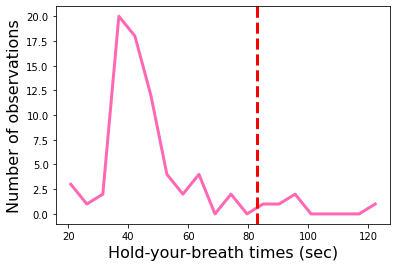

68/73 observations (prop=0.93) lower than 83.0 seconds


In [2]:
# Define my value.
v = 83.0

# Plot the histogram.
pyplot.plot(bin_centres, hist, '-', lw=3, color="#FF69B4")
pyplot.ylabel("Number of observations", fontsize=16)
pyplot.xlabel("Hold-your-breath times (sec)", fontsize=16)

# Plot my value in there.
pyplot.axvline(v, linestyle="--", lw=3, color="#FF0000")
pyplot.show()

# Compute how many values were lower.
lower = t < v
n_lower = numpy.sum(lower.astype(int))
p_lower = float(n_lower) / len(t)

print("{}/{} observations (prop={}) lower than {} seconds".format( \
    n_lower, len(t), round(p_lower, ndigits=2), round(v, ndigits=1)))

As you can see, about 93% of our sample falls below my time. This means that I would lose my argument only in 7% of cases.

Another way of thinking about this is to ask whether my time is surprising given the population. You could argue that my breath-holding ability is somewhat rare, with only 7% of people doing better. You could also argue that it's within the normal population, and that there are quite a lot of people who can hold their breath for much longer. Where you draw this line of what is surprising is arbitrary, and depends on context.

What you just calculated is akin to a *p value*. Our measured data forms a *probability distribution* that tells you just how likely each breath-holding time is. When a time is associated with value of p=0.07, it tells you that 93% of a population is expected to score lower.

If you would like to play around with distributions and p values some more, this Shiny app is great: https://gallery.shinyapps.io/dist_calc/

## When is a whole group of values noticably different from what I expected?

Imagine that you are an alien, unfamiliar with the human race. You came upon Earth, found a funny-looking mammal, and decided to bring it back to your ship. Unfortunately, you notice too late that humans don't thrive in your water tank, but in fact drown. You grab another one, and observe that they fare better in an environment closer to the earths atmosphere. It turns out they have this weird thing where they suck in air, and then breathe it out again. You assume that this is why they didn't do well in your water tank.

You now wonder whether humans have to continuously do this breathing thing, or whether they might have some internal reserves. From your initial water tank mishap, you assume that humans simply cannot do without continuosly inhaling and exhaling air. Hence, your hypothesis is that humans cannot hold their breath. Well, maybe for like 30 seconds, because that's how long your first human visibly struggled in the water tank.

You decide to run a study$^*$: You extract a number of Cambridge undergraduates, ask your subjects to stop exhaling new air, and measure how long it takes before they have to inhale again. Of course, you end up with the same data as we've just seen.

*\* You don't have to get IRB approval, because it is known that humans are primitive life that probably isn't even conscious. Many even wonder whether they feel pain at all, and even if they do, they probably wouldn't experience it in the same way as you, or even be able to conciously remember it.*

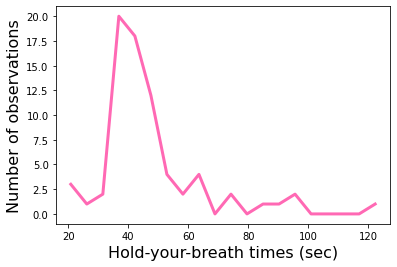

In [3]:
import numpy
from matplotlib import pyplot

# These times were measured during three stats classes.
times_a = [45.53, 41.30, 36.21, 49.3, 41.0, 63, 38.15, \
    35.1, 38.1, 47.9, 46.6, 23.0, 60.0, 42.0, 35.7, 41.2]
times_b = [42.0, 38.0, 46.0, 88.1, 125, 41.3, 36.0, \
    40.0, 43.7, 34.7, 38.4, 42.0, 61.0, 36.0, 43.4, \
    36.14, 18.23, 49.0, 38.0, 22.47, 35.51, 63.15, \
    35.2, 51.53, 34.13, 54.0, 43.2]
times_c = [94.0, 83.0, 95.0, 36.5, 49.0, 44.0, 43.0, \
    57.0, 35.8, 44.0, 44.4, 49.0, 39.0, 42.0, 35.0, \
    50.0, 53.0, 52.0, 33.0, 37.0, 48.0, 74.0, 41.0, \
    49.0, 38.0, 25.0, 61.0, 47.0, 41.0, 73.0]

# Let's add all the times together.
times = []
times.extend(times_a)
times.extend(times_b)
times.extend(times_c)
t = numpy.array(times, dtype=float)

# Make a histogram to count how frequently each breath-
# holding time occurs in the sample.
hist, edges = numpy.histogram(t, bins=20)
bin_centres = edges[:-1] + numpy.diff(edges)/2.0

# Plot the histogram.
pyplot.plot(bin_centres, hist, '-', lw=3, color="#FF69B4")
pyplot.ylabel("Number of observations", fontsize=16)
pyplot.xlabel("Hold-your-breath times (sec)", fontsize=16)
pyplot.show()


Your next question is simple: Is this what you expected? Do the results confirm your hypothesis that humans cannot hold their breath?

Your expectation was that humans could not hold their breath, or more specifically that they wouldn't be able to for more than about 30 seconds. The difficulty is in translating your expectation to the language of numbers and distributions.

Essentially, what you're saying is that you expect the average human being to be able to hold their breath for a maximum of 30 seconds. That doesn't have to mean that all humans abide by that: some will be worse, and some beter. In terms of a distribution, you're expecting that the central tendency of the distribution is around 30 seconds.

Let's plot your expected average in the histogram, and see if it aligns with the real average.

Expected mean: 30, real mean: 47.03


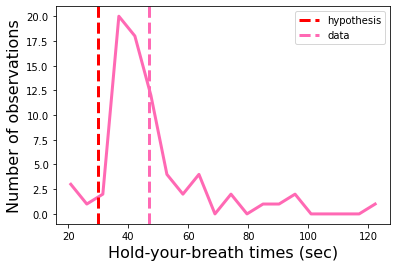

In [4]:
# Define expected average value.
m_expected = 30

# Compute the real average.
m_real = numpy.mean(t)
print("Expected mean: {}, real mean: {}".format( \
    round(m_expected, ndigits=2), round(m_real, ndigits=2)))

# Plot the histogram.
pyplot.plot(bin_centres, hist, '-', lw=3, color="#FF69B4")
pyplot.ylabel("Number of observations", fontsize=16)
pyplot.xlabel("Hold-your-breath times (sec)", fontsize=16)

# Plot the expected and real averages in there.
pyplot.axvline(m_expected, linestyle="--", lw=3, color="#FF0000", \
    label="hypothesis")
pyplot.axvline(m_real, linestyle="--", lw=3, color="#FF69B4", \
    label="data")
pyplot.legend(loc="upper right")
pyplot.show()


There are a few things of interest in this plot. For starters, your average (hot pink dashed line) doesn't seem to align perfectly with where the distribution is thickest. This is because the distribution is right-skewed, and thus the average might not be the ideal metric for the distributions central tendency. (Using the median would probably be better, but for now we'll just ignore that our data isn't normally distributed.)

The next interesting thing is that while a bit of the distribution is below your expected average, the real average is different from what you expected. How can you tell whether this difference is meaningul? This is where statistics come to the rescue.

If your expectation of a 30 second average breath-holding time was accurate, you would expect to find that samples that you measure would vary around 30 seconds. Sure, some samples would be slightly higher, and some lower, but over the whole they should sit around 30 seconds. Hence, if you were to run a lot of experiments, the averages that you find in each of them would form a distribution around 30 seconds. This distribution is called a *null distribution*.

The above means that there should be a relatively low chance that you find an average value that is a lot higher than 30 seconds. Therefore, finding such a value would be quite surprising. In fact, finding a few surprising results might even persuade you to abandon your initial hypothesis of a 30 second average, and instead lead you to believe that the average is higher. This is the core principle in *null-hypothesis significance testing*.

There is still one important question we haven't answered: When is a value considered "higher"? Specifically, you measured an average of about 47 seconds. This is obviously higher than the expected 30 seconds, but how can you tell whether it is meaningfully higher?

#### Variance

This is where the concept of *variance* comes in. Variance is how much measurements in a sample deviate from its mean. To compute it, you simply take the difference between each measurement and the mean. Unfortunately, when you average those differences, you should end up at 0, because there will be as many positive as there are negative differences (assuming the data is normally distributed). To deal with this, you could simply square all differences between each measurement and the mean. In that way, all differences are positive, so you can safely average them. (Of course, squaring all values will make them all super big, so afterwards you could take the square root of the average of squared differences, so that you end up with a reasonable value again.) The higher this value, the higher variance.

This idea is captured in the *standard deviation*, which is essentially the average unsigned difference between all measurments and their average. It's computed like this:

$s(x) = \sqrt{{{ \Sigma^{n}_{i=1} (x_{i} - \bar{x})^{2} } \over {n}}}$

In this equation, $x$ is all our measurements, $n$ is our sample size, and $\bar{x}$ is the average of our measurement.

The neat thing about variance is that it gives us an idea of the context of an observed difference. Take, for example, a breath-holding time of 67 seconds (20 seconds above the average): If measurements on average deviated 100 seconds from the average, then 20 seconds doesn't sound like a very big value. (It's only 0.2 standard deviations.) However, if they only deviated by 2 seconds, 20 seconds seems like a pretty unexpected value! (That would be 10 standard deviations!)

#### Standard error

The average and standard deviation are *population characteristics*. They reflect the central tendency and spread of values in a population. Imagine the breath-holding abilities of all people on earth. The more people you test, the closer your estimation of the average and standard deviation is going to be to the real population, up until the point that you've tested every single member of the population.

Imagine that you, the alien who's super interested in how long humans can hold their breath, do a whole bunch of studies. In each, you take a sample of humans, and measure the samples average breath-holding ability. You won't get the same mean every time, but because the humans all come from the same population of "humans on earth", it's more likely that you will find means closer to the population mean. In other words, the means that you measure in each of your studies will form their own distribution.

Let's illustrate this point in your own sample:

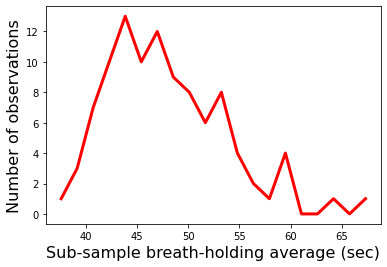

In [5]:
# Seed the random number generator (this makes
# sure that we get the same result when re-running
# this code, which is not necessary, but good
# for in-class demo purposes.)
numpy.random.seed(3)

# Define the number of sub-samples.
n_samples = 100

# Count the number of observations you had in
# your original measurement.
n = len(t)

# Keep a record of the means that you find for
# each sub-sample.
m = numpy.zeros(n_samples, dtype=float)
# Run through all "studies"
for i in range(n_samples):
    # Choose a random sub-sample of 10 people
    # from the measured times.
    sub_sample = numpy.random.choice(n, 10)
    # Compute the average of this sub-sample.
    m[i] = numpy.mean(t[sub_sample])

# Make a histogram to count how frequently each breath-
# holding average time occured in the sub-samples.
hist, edges = numpy.histogram(m, bins=20)
bin_centres = edges[:-1] + numpy.diff(edges)/2.0

# Plot the histogram.
pyplot.plot(bin_centres, hist, '-', lw=3, color="#FF0000")
pyplot.ylabel("Number of observations", fontsize=16)
pyplot.xlabel("Sub-sample breath-holding average (sec)", fontsize=16)
pyplot.show()


The above illustrates how the sample means would be distributed if you had taken samples of 10 people from your "population" of your actual sample of 73 undergraduate students. As you can see, the sub-sample averages are centred around the population mean of 47 seconds.

You can use your new knowledge of this sample mean distribution to compute your expected measurement error. This is known as the *standard error of the mean*, and gives you an idea of how well your sample reflects the true population mean. You compute it by dividing the standard deviation (computed above) by the square root of the number of observations.

$s(\bar{x}) = {{s} \over {\sqrt{n}}}$

This equation tells you that the more people are in your sample, i.e. the higher $n$ is, the lower your standard error is going to be.

#### One-sample t-test

For this next trick, you will use variance to quantify how much you believe in your observed difference. Sprecifically, you're going to take your breath-holding difference (between the expected value and the observed average), and you'll divide that by the standard error of the mean.

This is a sensible thing to do: You observed a particular difference (signal), and now you're putting that difference into the perspective of expected measurement error (noise). In a way, you're just trying to figure out whether your observed difference is a product of the noise in your measurement, or whether it might actually be because your hypothesis was wrong.

$t = {{\bar{x} - \mu_{0}} \over {s_{\bar{x}}}}$

The numerator here is your observed average (47 seconds) minus your expected average (30 seconds). In other words, this is the difference between your measurement and your null hypothesis. If your null hypothesis is true, you would expect this value to be 0.

The denominator is your "noise". The higher the standard error of the mean, the lower your confidence in your measured average is, and hence the lower your confidence in its difference from the null hypothesis. More noise directly translates into a lower $t$ value.

So let's see all of this in practice:

In [6]:
# Define your expected average.
m_null = 30.0

# Count the number of observations.
n = len(t)

# Compute the average.
m = numpy.mean(t)

# Compute the standard deviation.
sd = numpy.sqrt(numpy.sum((t - m)**2) / (n))

# Compute the standard error of the mean.
sem = sd / numpy.sqrt(n-1)

# Now compute the t-value.
t_val = (m - m_null) / sem

print("m={}, sd={}, sem={}, t={}".format( \
    round(m, ndigits=2), \
    round(sd, ndigits=2), \
    round(sem, ndigits=2), \
    round(t_val, ndigits=2)))

m=47.03, sd=17.28, sem=2.04, t=8.36


Great! The $t$-value is over 8!

But... Is that a lot?

Remember, we expect a $t$ value of 0 if the null hypothesis is true. We also expect a low $t$ value if the measurement noise is high. In order to know whether this $t$ is surprising, we need to know what the $t$ distribution looks like. (You can also mess around with an interactive $t$ distribution here: https://rpsychologist.com/d3/tdist/ )

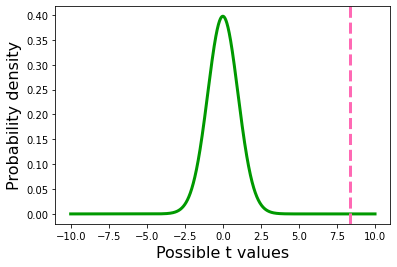

In [7]:
import scipy.stats

# Create x values.
x = numpy.arange(-10.0, 10.01, 0.01)
# Create t values, based on the degrees of freedom.
t_dist = scipy.stats.t.pdf(x, df=n-1)

# Plot the t distribution.
pyplot.plot(x, t_dist, '-', lw=3, color="#009900")
pyplot.xlabel("Possible t values", fontsize=16)
pyplot.ylabel("Probability density", fontsize=16)
# Plot our t value in the plot.
pyplot.axvline(t_val, linestyle="--", lw=3, color="#FF69B4")
pyplot.show()

So it looks like the $t$ value that you observed (hot pink dashed line) is not very likely at all given the distrubution of $t$ values! You can compute exactly how likely it is that a $t$ value is equal to or higher than yours:

In [8]:
p_val = 1.0 - scipy.stats.t.cdf(t_val, df=n-1)

print("One-sided p value = {}".format(p_val))

One-sided p value = 1.6316947792915926e-12


This is testing a *directional hypothesis*: Whether the observed $t$ value is higher than expected given the $t$ distribution. However, sometimes you might not have a directional hypothesis, but simply wonder whether an observed value is different from your expectation, whether that is higher or lower. You can then compute how likely it is to observe a $t$ value of higher or equal to the absolute $|t|$ value, or equal to or lower than $-|t|$.

In [9]:
p_val = 2.0 * (1.0 - scipy.stats.t.cdf(numpy.abs(t_val), df=n-1))

print("Two-sided p value = {}".format(p_val))

Two-sided p value = 3.263389558583185e-12


If you've been following the Python code, you'll be delighted to know that we can simplify the above code by using existing functions:

In [10]:
from scipy.stats import ttest_1samp

# Define your expected average.
m_null = 30.0

# Count the number of observations.
n = len(t)

# Compute the average.
m = numpy.mean(t)

# Compute the standard deviation.
sd = numpy.std(t)

# Compute the standard error of the mean.
sem = sd / numpy.sqrt(n)

# Now compute the t-value.
t_val, p_val = ttest_1samp(t, m_null)

print("m={}, sd={}, sem={}, t={}, p={}".format( \
    round(m, ndigits=2), \
    round(sd, ndigits=2), \
    round(sem, ndigits=2), \
    round(t_val, ndigits=2), \
    p_val))

m=47.03, sd=17.28, sem=2.02, t=8.36, p=3.263355145304234e-12


#### What does this p value mean?

The $p$ value that you just computed is the probability of you finding an average breath-holding time that is equal or more extreme than 47 seconds, *if the null hypothesis is true*.

This is important, so I'm going to stress it: *If your expected average of 30 seconds is the real population average*, the estimated probability of you measuring a 47 second average in your sample of 73 people is $3.26e-12$.

This could mean two things:

1) This is a fluke, the true population average is 30 seconds, and you just happened to test a sample of people with a higher average. Random chance. It's unlikely, but it happens.

2) Maybe your expected average of 30 seconds isn't the true population mean.

How do you known which of these two options is correct? Simple: You don't! Not on the basis of a single study, anyways. You could do more studies, and compute $p$ values for all those studies too. If the null hypothesis ("humans can hold their breath for 30 seconds on average") is true, the $p$ values should be uniformly distributed between 0 and 1. If the null hypothesis is not true, you would expect $p$ values to be skewed towards 0.

For a cool demo on the $p$ value distribution, see here: https://rpsychologist.com/d3/pdist/

## Differences between two measurements within the same individuals

Before now, you had a very specific hypothesis based on some pilot data (N = 1 accidentally drowned human in a water tank after 30 seconds). Now that you've found a group of humans with a higher average breath-holding ability, you consider the possibility that maybe they got better at holding their over time.

Being able to train humans to hold their breath for long times would be great for you: It would mean you could stick them in water tanks to do all the necessary experiments, without risking they die before your experiments finish. You thus set up a new experiment: You'll take your existing sample of humans, and you make them hold their breath for as long as they can for five times a day. You also make them run around your space ship a lot$^*$.

*\*This is not because you think it will increase their lung capacity, but because they keep trying to escape their enclosure.*

You now have data on how long your sample could hold their breath at the time of first measurement, and also data from a measurement several weeks from the first.

In [11]:
# Load the raw data.
raw_data = numpy.loadtxt("breath_times.csv", \
    delimiter=",", dtype=float, unpack=True)

# Convenience renaming.
x1 = raw_data[0,:]
x2 = raw_data[1,:]

Your question is simple: Is the average breathing time different at the second time? If so, humans might be made to improve, and that would be wonderful for your water tank experiments!

Let's start with the basics: Compute the difference between the first and second measurement:

In [12]:
# Compute the difference.
difference = x2 - x1

Positive values reflect a longer breath-holding time at the second measurement (potential improvement), whereas negative values reflect a longer breath-holding time at the first measurement (potential decline).

Let's compute the mean, standard deviation, and standard error of the mean for these differences.

In [13]:
# Count the number of observations.
n = len(difference)

# Compute the average.
m = numpy.mean(difference)

# Compute the standard deviation.
sd = numpy.sqrt(numpy.sum((difference - m)**2) / (n))

# Compute the standard error of the mean.
sem = sd / numpy.sqrt(n-1)

print("m={}, sd={}, sem={}".format( \
    round(m, ndigits=2), \
    round(sd, ndigits=2), \
    round(sem, ndigits=2)))

m=7.58, sd=20.09, sem=2.37


In this case, your null hypothesis is that humans can't improve. Thus, your expected difference is 0 milliseconds.

Because you have this specific prediction, you can compute a $t$ value again!

In [14]:
# Define your expected average.
m_null = 0.0

# Now compute the t-value.
t_val = (m - m_null) / sem

print("m={}, sd={}, sem={}, t={}".format( \
    round(m, ndigits=2), \
    round(sd, ndigits=2), \
    round(sem, ndigits=2), \
    round(t_val, ndigits=2)))

m=7.58, sd=20.09, sem=2.37, t=3.2


This also means you can see where the $t$ value lies on the expected probability distribution, and compute a $p$ value from that point on the distribution:

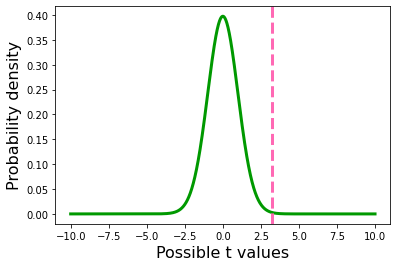

Two-sided p value = 0.0020422086314924037


In [15]:
# Create x values.
x = numpy.arange(-10.0, 10.01, 0.01)
# Create t values, based on the degrees of freedom.
t_dist = scipy.stats.t.pdf(x, df=n-1)

# Plot the t distribution.
pyplot.plot(x, t_dist, '-', lw=3, color="#009900")
pyplot.xlabel("Possible t values", fontsize=16)
pyplot.ylabel("Probability density", fontsize=16)
# Plot our t value in the plot.
pyplot.axvline(t_val, linestyle="--", lw=3, color="#FF69B4")
pyplot.show()

# Compute the p value.
p_val = 2.0 * (1.0 - scipy.stats.t.cdf(numpy.abs(t_val), df=n-1))

print("Two-sided p value = {}".format(p_val))

#### Related-samples t-test

What you've just done, is called a *related-samples t-test*. It's used to test for differences between two measurements *within participants*. The null hypothesis is that there is no difference between the two related measurements.

In [16]:
from scipy.stats import ttest_1samp, ttest_rel

# One-sample t-test of the difference between two related measurements.
t_val, p_val = ttest_1samp(x2-x1, 0)
print("One-sample t-test:      t={}, p={}".format( \
    round(t_val, ndigits=2), p_val))

# Related-samples t-test of the difference between two related measurements.
t_val, p_val = ttest_rel(x2, x1)
print("Related-samples t-test: t={}, p={}".format( \
    round(t_val, ndigits=2), p_val))

One-sample t-test:      t=3.2, p=0.0020422086314923617
Related-samples t-test: t=3.2, p=0.0020422086314923617


## Differences in a measurement in two different groups

You, at this point more-or-less accidentally the galaxy's foremost expert on human breathing, decide that it's too much of a hassle to train humans to hold their breath for longer. Instead, you decide to investigate whether certain subsets of humans might have longer breath-holding times. These would be ideal water-tank inhabitants!

You decide to compare your existing sample with an entirely different group of humans who you think might be better at holding their breath. You reason that this second group of humans spends a lot more time in the water, so they must be better at holding their breath. In fact, they seem to have some adaptations that other humans lack, including a dorsal fin and a single hindleg that seems to propel them in the water.

Have a look at the data:

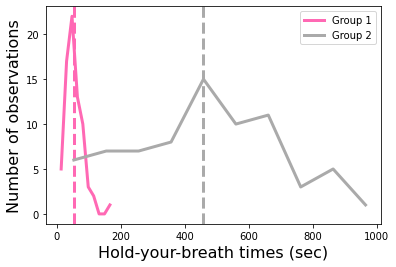

In [17]:
import numpy
from matplotlib import pyplot

# Load the raw data.
raw_data = numpy.loadtxt("breath_times_between-subjects.csv", \
    delimiter=",", dtype=float, unpack=True)

# Convenience renaming.
group_1 = raw_data[0,:]
group_2 = raw_data[1,:]

# Set some colours for the groups.
colours = ["#FF69B4", "#AAAAAA"]

# Loop through the groups.
for i, group_n in enumerate([group_1, group_2]):

    # Compute the real average.
    m_real = numpy.mean(group_n)

    # Make a histogram to count how frequently each breath-
    # holding time occurs in the sample.
    hist, edges = numpy.histogram(group_n, bins=10)
    bin_centres = edges[:-1] + numpy.diff(edges)/2.0

    # Plot the histogram.
    pyplot.plot(bin_centres, hist, '-', lw=3, color=colours[i], \
        label="Group {}".format(i+1))

    # Plot the expected and real averages in there.
    pyplot.axvline(m_real, linestyle="--", lw=3, color=colours[i])

# Finish the plot.
pyplot.ylabel("Number of observations", fontsize=16)
pyplot.xlabel("Hold-your-breath times (sec)", fontsize=16)
pyplot.legend(loc="upper right")
pyplot.show()


It's pretty clear that these two groups are very different. However, you'd still like to get some statistical validation. Unfortunately, you can't use a related-samples t-test, as that was for measurements within the same individuals. Here, there are two groups of different individuals, so you can't simply compute difference scores.

#### Independent samples t-test

In a paired-samples t-test, you computed the differences between pairs of data (measurements collected within an individual). You then computed the average and the variance of this difference, and used those in your assessment of whether the two groups of measurements were different. For two independent groups, the data is not paired in the same way. This makes it impossible to use the same approach.

You can still compute the average and variance in each group. This means you could still compute the numerator in a t-test as the difference between the group means:

${\bar{x_{1}} - \bar{x_{2}}}$

Previously, the denominator was the standard error of the mean: The standard divided by the square root of the number of samples. Here, however, we have *two* standard deviations; one for each group. We need to combine those into the *pooled standard deviation* before we can compute a $t$ value:

$s_{pooled} = \sqrt{ {s^{2}_{x_{1}} + s^{2}_{x_{2}}} \over {2} }$

And now you can compute a $t$ value!

$t = { {\bar{x_{1}} - \bar{x_{2}}} \over {s_{pooled} \sqrt{{2 \over n}}} }$

Or, in code:

In [18]:
from scipy.stats import ttest_ind

t, p = ttest_ind(group_2, group_1)

print("t = {}".format(t))

t = 14.593231010325255


The equation for $t$ above is only applicable when two assumptions are met: The groups must be of equal size, and the groups must be of equal variance.

If the groups are not of equal size, the pooled standard deviation instead becomes a weighted average of the two independent standard deviations.

If the groups are of unequal variance, things get even more complicated. The denominator is caluclated differently, and the degrees of freedom (used to construct a $t$ distribution) are computed in a different way too.

The best thing to do here, is use *Welch's test*. This is a modified independent-samples t-test that can handle unequal group sizes and variances. In code:

In [19]:
t, p = ttest_ind(group_2, group_1, equal_var=False)

print("t = {}".format(t))

t = 14.593231010325255


# Assignments

The following assignments allow you to practice with t-tests a bit. There are coding assignments, but also theory ones. The answers should all be on this worksheet.

### Assignment 1

Describe what a *p*-value is. (Double-click on the text below to edit it.

A *p*-value is...

### Assignment 2

Compute whether there is a difference between the following two independent samples, group A and group B. In addition, plot them in the way you think is most suitable.

The existing code generates random samples A and B.

In [23]:
import numpy

# Generate samples A and B.
a = 0.8*(numpy.random.randn(1000) + 0.1) \
    + 0.2 * numpy.random.rand(1000)
b = 0.8*(numpy.random.randn(1000)) \
    + 0.2 * numpy.random.rand(1000)

# TODO: Compute whether the mean difference between
# the groups is statistically significant.

# TODO: Plot the data in a sensible way.


### Assignment 3

Compute whether there is a difference between the following dependent samples, time 1 and time 2. In addition, plot them in the way you think is most suitable.

The existing code generates random samples 1 and 2.

In [25]:
# Compute related samples 1 and 2.
m = [0, 0.1]
cov = [[1.0,0.6],
       [0.6,1.0]]
X = numpy.random.multivariate_normal(m, cov, 1000)
time_1 = X[:,0]
time_2 = X[:,1]

# TODO: Compute whether the mean difference between
# times 1 and 2 is statistically significant.

# TODO: Plot times 1 and 2 in the most sensible way.

(1000,)


### Assignment 4

In this assignment, it is up to you to simulate data. You are doing so to determine the statistical power of an independent-samples t-test for an effect size of Cohen's *d*=0.3, for sample sizes ranging from N=10 per group to N=1000 per group.

Statistical power is the probability of the *p*-value of a test falling below the significance threshold (here set at 0.05) when there is a true effect. This can be approximated as the proportion of tests that produce a *p*-value below the threshold.

The ideal way, would be to follow these steps:

1. Create an empty list to hold in the statistical power per sample size.
2. Create a list of sample sizes per group. These should include the following: 10, 20, 40, 80, 160, 320, 640, 1280.
3. Use a for loop to go through all of the above sample sizes, and for each follow steps 4-9.
4. Create a new list to hold all *p*-values in for the following simulations.
5. Use a for loop to run 1000 simulations. For each, run steps 6-8.
6. Generate two random samples, each normally distributed with mean 0 and standard deviation 1. Make sure the number of values in each sample is the current sample size per group. Name the samples group_a and group_b.
7. Add 0.3 to all values in group_b.
8. Do an independent-samples t-test, and add the *p*-value to your list of *p*-values (from step 4).
9. Compute the proportion of *p*-values that fell below the threshold of 0.05. Add this proportion to the list of power per sample size (from step 1).
10. Plot the power (y-axis) as a function of sample size (x-axis).

In [ ]:
# Write your code here!